# <center>Feedforward and Backpropagation</center>
## <center>Inclass Project 2 - MA4144</center>

This project contains 12 tasks/questions to be completed, some require written answers. Open a markdown cell below the respective question that require written answers and provide (type) your answers. Questions that required written answers are given in blue fonts. Almost all written questions are open ended, they do not have a correct or wrong answer. You are free to give your opinions, but please provide related answers within the context.

After finishing project run the entire notebook once and **save the notebook as a pdf** (File menu -> Save and Export Notebook As -> PDF). You are **required to upload this PDF on moodle and also the ipynb notebook file as well**.

***

## Outline of the project

The aim of the project is to build a Multi Layer perceptron (MLP) model from scratch for binary classification. That is given an input $x$ output the associated class label $0$ or $1$.

In particular, we will classify images of handwritten digits ($0, 1, 2, \cdots, 9$). For example, given a set of handwritten digit images that only contain two digits (Eg: $1$ and $5$) the model will classify the images based on the written digit.

For this we will use the MNIST dataset (collection of $28 \times 28$ images of handwritten digits) - you can find additional information about MNIST [here](https://en.wikipedia.org/wiki/MNIST_database).

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f7/MnistExamplesModified.png" width="250">

***


Use the below cell to use any include any imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

## Section 1: Preparing the data

In [2]:
#Load the dataset as training and testing, then print out the shapes of the data matrices.
#The training data will be provided to you.

data = np.load('train_mnist.npz')
train_X = data['x']
train_y = data['y']
print(train_X.shape)
print(train_y.shape)

(60000, 28, 28)
(60000,)


**Q1.** In the following cell write code to display $5$ random images in train_X and it's corresponding label in train_y. Each time it is run, you should get a different set of images. The imshow function in the matplotlib library could be useful. Display them as [grayscale images](https://en.wikipedia.org/wiki/Grayscale).

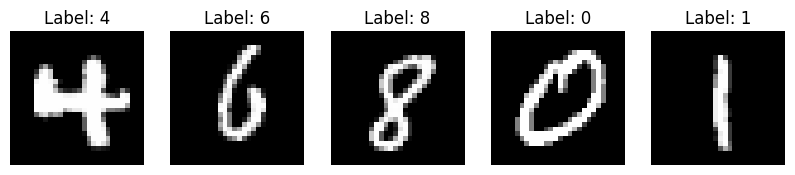

In [3]:
#TODO Code to display 5 random handritten images from train_X and corresponting labels from train_y
# Select 5 random indices
random_indices = np.random.choice(train_X.shape[0], 5, replace=False)

# Plot the images
plt.figure(figsize=(10, 5))
for i, idx in enumerate(random_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(train_X[idx], cmap='gray')  # Display as grayscale
    plt.title(f"Label: {train_y[idx]}")
    plt.axis('off')

plt.show()


**Q2.** Given two digits $d_1$ and $d_2$, both between $0$ and $9$, in the following cell fill in the function body to extract all the samples corresponding to $d_1$ or $d_2$ only, from the dataset $X$ and labels $y$. You can use the labels $y$ to filter the dataset. Assume that the label for the $i$th image $X[i]$ in $X$ is given by $y[i]$. The function should return the extracted samples $X_{extracted}$ and corresponding labels $y_{extracted}$. Avoid using for loops as much as possible, infact you do not need any for loops. numpy.where function should be useful.

In [4]:
def extract_digits(X, y, d1, d2):
    assert d1 in range(0, 10), "d1 should be a number between 0 and 9 inclusive"
    assert d2 in range(0, 10), "d2 should be a number between 0 and 9 inclusive"
    
    # Extract indices where y is either d1 or d2
    indices = np.where((y == d1) | (y == d2))
    
    # Extract corresponding samples and labels
    X_extracted = X[indices]
    y_extracted = y[indices]
    
    return (X_extracted, y_extracted)



**Q3.** Both the training dataset is a 3 dimensional numpy array, each image occupies 2 dimensions. For convenience of processing data we usually comvert each $28 \times 28$ image matrix to a vector with $784$ entries. We call this process **vectorize images**.

Once we vectorize the images, the vectorized data set would be structured as follows: $i$th row will correspond to a single image and $j$th column will correspond to the $j$th pixel value of each vectorized image. However going along with the convention we discussed in the lecture, the input to the MLP model will require that the columns correspond to individual images. Hence we also require a transpose of the vectorized results.

The pixel values in the images will range from $0$ to $255$. Normalize the pixel values between $0$ and $1$, by dividing each pixel value of each image by the maximum pixel value of that image. Simply divide each column of the resulting matrix above by the max of each column. 

<center><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTdN_8m9FEqjqAB07obTmB6gNc7S2rSoGBYaA&s"></center>

Given a dataset $X$ of size $N \times 28 \times 28$, in the following cell fill in the function to do the following in order;
1. Vectorize the dataset resulting in dataset of size $N \times 784$.
2. Transpose the vectorized result.
3. Normalize the pixel values of each image.
4. Finally return the vectorized, transposed and normalized dataset $X_{transformed}$.

Again, avoid for loops, functions such as numpy.reshape, numpy.max etc should be useful.

In [5]:
def vectorize_images(X): 
    # Vectorize the dataset (reshape to N x 784)
    X_vectorized = X.reshape(X.shape[0], -1)
    
    # Transpose the result to 784 x N
    X_vectorized = X_vectorized.T
    
    # Normalize pixel values (divide each column by its max value)
    X_vectorized = X_vectorized / np.max(X_vectorized, axis=0, keepdims=True)
    
    return X_vectorized




**Q4.** In the following cell write code to;

1. Extract images of the digits $d_1 = 1$ and $d_2 = 5$ with their corresponding labels for the training set (train_X, train_y).
2. Then vectorize the data, tranpose the result and normlize the images.
3. Store the results after the final transformations in numpy arrays train_X_1_5, train_y_1_5.
4. Our MLP will output only class labels $0$ and $1$ (not $1$ and $5$), so create numpy arrays to store the class labels as follows:
   $d_1 = 1$ -> class label = 0 and $d_2 = 5$ -> class label = 1. Store them in an array named train_y_1_5.

Use the above functions you implemented above to complete this task. In addtion, numpy.where could be useful. Avoid for loops as much as possible.

In [6]:
#TODO
#Extract and organize the training data as described above.
#Here you will be using the functions you implemented above appropriately


# Extract images of digits 1 and 5
train_X_1_5, train_y_1_5 = extract_digits(train_X, train_y, 1, 5)

# Vectorize, transpose, and normalize the images
train_X_1_5 = vectorize_images(train_X_1_5)

# Convert labels: 1 -> 0, 5 -> 1
train_y_1_5 = np.where(train_y_1_5 == 1, 0, 1)


## Section 2: Implementing MLP from scratch with training algorithms.

Now we will implement code to build a customizable MLP model. The hidden layers will have the **Relu activation function** and the final output layer will have **Sigmoid activation function**.

**Q5.** Recall the following about the activation functions:
1. Sigmoid activation: $y = \sigma(z) = \frac{1}{1 + e^{-z}}$.
2. Derivative of Sigmoid: $y' = \sigma'(z) = \sigma(z) (1 - \sigma(z)) = y(1-y)$
3. ReLu activation: $y = ReLu(z) = max(0, z)$
4. Derivative of ReLu: $y' = ReLu'(z) = \begin{cases} 0 \; \textrm{if } z < 0 \\ 1 \; \textrm{otherwise} \end{cases} = \begin{cases} 0 \; \textrm{if } y = 0 \\ 1 \; \textrm{otherwise} \end{cases}$

In the following cell implement the functions to compute activation functions Sigmoid and ReLu given $z$ and derivatives of the Sigmoid and ReLu activation functions given $y$. Note that, in the implementation, the derivative functions should actually accept $y$ as the input not $z$.

In practice the input will not be just single numbers, but matrices. So functions or derivatives should be applied elementwise on matrices. Again avoid for loops, use the power of numpy arrays - search for numpy's capability of doing elementwise computations.

Important: When implementing the sigmoid function make sure you handle overflows due to $e^{-z}$ being too large. To avoid you can choose to set the sigmoid value to 'the certain appropriate value' if $z$ is less than a certain good enough negative threshold. If you do not handle overflows, the entire result will be useless since the MLP will just output Nan (not a number) for every input at the end.

In [7]:


def sigmoid(Z):
    Z = np.clip(Z, -500, 500)  # Prevent overflow issues
    sigma = 1 / (1 + np.exp(-Z))
    return sigma

def deriv_sigmoid(Y):
    sigma_prime = Y * (1 - Y)
    return sigma_prime

def ReLu(Z):
    relu = np.maximum(0, Z)
    return relu

def deriv_ReLu(Y):
    relu_prime = (Y > 0).astype(float)
    return relu_prime


**Q6.** The following piece of code defines a simple MLP architecture as a Python class and subsequent initialization of a MLP model. <font color='blue'>Certain lines of code contains commented line numbers. Write a short sentence for each such line explaining its purpose. Feel free to refer to the lecture notes or any resources to answers these question. In addition, explain what the Y, Z, W variables refer to and their purpose</font>

In [8]:
class NNet:
    def __init__(self, input_size = 784, output_size = 1, batch_size = 1000, hidden_layers = [500, 250, 50]):
        self.Y = []
        self.Z = []
        self.W = []
        self.input_size = input_size
        self.output_size = output_size
        self.batch_size = batch_size
        self.hidden_layers = hidden_layers

        layers = [input_size] + hidden_layers + [output_size]
        L = len(hidden_layers) + 1
    
        for i in range(1, L + 1):
            self.Y.append(np.zeros((layers[i], batch_size)))                        #line1
            self.Z.append(np.zeros((layers[i], batch_size)))                        #Line2
            self.W.append(2*(np.random.rand(layers[i], layers[i-1] + 1) - 0.5))     #Line3

**Answers**

(i) **What do the Y, Z, and W variables refer to and their purpose?**  
- **Y (Activations):** Stores the outputs of each layer after applying the activation function. Used for forward propagation.  
- **Z (Pre-activations):** Stores the raw computed values before applying the activation function. Helps in backpropagation.  
- **W (Weights):** Stores the weight matrices for each layer, including biases. Updated during training to optimize the model.  

(ii) **Line 1: Explanation**  
This initializes an empty activation matrix `Y[i]` for the `i`-th layer with dimensions `(number of neurons in layer i, batch size)`. It stores the activated outputs of neurons during forward propagation.  

(iii) **Line 2: Explanation**  
This initializes an empty pre-activation matrix `Z[i]` for the `i`-th layer with dimensions `(number of neurons in layer i, batch size)`. It holds the computed values before activation is applied.  

(iv) **Line 3: Explanation**  
This initializes a weight matrix `W[i]` for the `i`-th layer with dimensions `(number of neurons in layer i, number of neurons in previous layer + 1)`. The `+1` accounts for the bias term. The weights are randomly initialized in the range `[-1, 1]` to ensure proper weight distribution at the start of training.  


**Q7.** Now we will implement the feedforward algorithm. Recall from the lectures that for each layer $l$ there is input $Y^{(l-1)}$ from the previous layer if $l > 1$ and input data $X$ if $l = 1$. Then we compute $Z^{(l)}$ using the weight matrix $W^{(l)}$ as follows from matrix multiplication:

$Z^{(l)} = W^{(l)} Y^{(l-1)}$

Make sure that during multiplication you add an additional row of one's to $Y^{(l-1)}$ to accommodate the bias term (concatenate the row of ones as the last row to be consistent with the grader). However, the rows of ones should not permanently remain on $Y^{(l-1)}$. <font color='blue'>Explain what the bias term is and how adding a row of one's help with the bias terms.</font> The weight matrices are initialised to afford this extra bias term, so no change to either $Z^{(l)}$ or $W^{(l)}$ is needed.

Next compute $Y^{(l)}$, the output of layer $l$ by activation through sigmoid.

$Y^{(l)} = \sigma(Z^{(l)})$

The implemented feedforward algorithm should take in a NNet model and an input matrix $X$ and output the modified MLP model - the $Y$'s and $Z$'s computed should be stored in the model for the backpropagation algorithm.

As usual, avoid for loops as much as possible, use the power of numpy. However, you may use a for loop to iterate through the layers of the model.

In [9]:
def feedforward(model, X):
    Y_prev = X
    for l in range(len(model.W)):
        Y_prev_with_bias = np.vstack((Y_prev, np.ones((1, Y_prev.shape[1]))))
        model.Z[l] = model.W[l] @ Y_prev_with_bias
        if l == len(model.W)-1:
            model.Y[l] = sigmoid(model.Z[l])
        else:
            model.Y[l] = ReLu(model.Z[l])
        Y_prev = model.Y[l]
    return model

**Answer**  

The **bias term** is a constant added to the weighted sum of inputs in a neural network. It helps the model learn better by allowing activation functions to shift, enabling neurons to activate even when the weighted sum of inputs is zero. This makes the network more flexible and improves learning efficiency.  

**How adding a row of ones helps with bias terms:**  
Instead of explicitly handling bias as a separate parameter, we include it as an additional weight by appending a row of ones to the input matrix. This allows the bias term to be naturally incorporated into the matrix multiplication with weights, simplifying calculations and ensuring consistent implementation across layers.


**Q8.** Now we will implement the backpropagation algorithm. The cost function $C$ at the end is given by the square loss.

$C = \frac{1}{2} ||Y^{(L)} - Y||^{2}$, where $Y^{(L)}$ is the final output vector of the feedforward algorithm and $Y$ is the actual label vector associated with the input $X$.

At each layer $l = 1, 2, \cdots, L$ we compute the following (note that the gradients are matrices with the same dimensions as the variable to which we derivating with respect to):

1. Gradient of $C$ with respect to $Z^{(l)}$ as <br> $\frac{\partial C}{\partial Z^{(l)}} = deriv(A^{(l)}(Z^{(l)})) \odot \frac{\partial C}{\partial Y^{(L)}} $, <br> where $A^{(l)}$ is the activation function of the $l$th layer, and we use the derivative of that here. The $\odot$ refers to the elementwise multiplication.

2. Gradient of $C$ with respect to $W^{(l)}$ as <br> $\frac{\partial C}{\partial W^{(l)}} = \frac{\partial C}{\partial Z^{(l)}} (Y^{(l-1)})^{T}$ <br> this is entirely matrix multiplication.

3. Gradient of $C$ with respect to $Y^{(l-1)}$ as <br> $\frac{\partial C}{\partial Y^{(l-1)}} = (W^{(l)})^{T} \frac{\partial C}{\partial Z^{(l)}}$ <br> this is also entirely matrix multiplication.

4. Update weights by: <br> $W^{(l)} \leftarrow W^{(l)} - \eta \frac{\partial C}{\partial W^{(l)}}$, <br> where $\eta > 0$ is the learning rate.

The loss derivative (the gradient of $C$ with respect to $Y^{(L)}$) at the last layer is given by:

$\frac{\partial C}{\partial Y^{(L)}} = Y^{(L)} - Y$

By convention we consider $Y^{(0)} = X$, the input data.

Based on the backpropagation algorithm implement the backpropagation method in the following cell. Remember to temporarily add a row of ones to $Y^{(l-1)}$ (as the last row to be consistent with the grader) when computing $\frac{\partial C}{\partial W^{(l)}}$ as we discussed back in the feedforward algorithm. Make sure you avoid for loops as much as possible.

The function takes in a NNet model, input data $X$ and the corresponding class labels $Y$. learning rate can be set as desired.

In [10]:
def backpropagation(model, X, Y, eta=0.01):
    # Output layer delta
    delta = (model.Y[-1] - Y) * deriv_sigmoid(model.Y[-1])
    for l in reversed(range(len(model.W))):
        if l == 0:
            Y_prev = X
        else:
            Y_prev = model.Y[l-1]
        Y_prev_with_bias = np.vstack((Y_prev, np.ones((1, Y_prev.shape[1]))))
        dW = delta @ Y_prev_with_bias.T
        model.W[l] -= eta * dW
        if l > 0:
            delta_prev = model.W[l].T @ delta
            delta_prev = delta_prev[:-1, :]  # Remove bias term
            delta = delta_prev * deriv_ReLu(model.Y[l-1])
    return model

**Q9.** Now implement the training algorithm.

The training method takes in training data $X$, actual label $Y$, number of epochs, batch_size, learning rate $\eta > 0$. The training will happen in epochs. For each epoch, permute the data columns of both $X$ and $Y$, then divide both $X$ and $Y$ into mini batches each with the given batch size. Then run the feedforward and backpropagation for each such batch iteratively.

At the end of each iteration, keep trach of the cost $C$ and the $l_2$-norm of change in each weight matrix $W^{(l)}$.

At the end of the last epoch, plot the variation cost $C$ and change in weight matrices. Then return the trained model.



In [11]:
def train_NNet(X, Y, epochs=200, batch_size=1000, eta=0.001):
    input_size, N = X.shape
    model = NNet(input_size=input_size, batch_size=batch_size)
    costs = []
    for epoch in range(epochs):
        perm = np.random.permutation(N)
        X_shuffled = X[:, perm]  # Shuffle columns (samples) of X
        Y_shuffled = Y[:, perm]  # Shuffle columns (samples) of Y (corrected line)
        for i in range(0, N, batch_size):
            X_batch = X_shuffled[:, i:i+batch_size]
            Y_batch = Y_shuffled[:, i:i+batch_size]
            model = feedforward(model, X_batch)
            C = 0.5 * np.mean((model.Y[-1] - Y_batch)**2)
            costs.append(C)
            model = backpropagation(model, X_batch, Y_batch, eta)
        print(f"Epoch {epoch+1}, Loss: {C}")
    plt.plot(costs)
    plt.title('Training Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.show()
    return model

## Section 3: Evaluation using test data

**Q10.** Implement the following function predict. Given test images (3 dimensional numpy array that contains $28 \times 28$ digit images) it will correctly recognize the written digits between d1 and d2. You can assume that test_images will only contain images of digits d1 and d2. Inside predict you would need to preprocess the images using vectorize, predict the correct labels using model and then output the correct lables. Output should be a vector predicted of d1's and d2's, predicted[i] should correspond to the test_image[i].

In [12]:
def predict(model, test_images, d1, d2):
    X_test = vectorize_images(test_images)
    model = feedforward(model, X_test)
    preds = (model.Y[-1] >= 0.5).astype(int).flatten()
    return np.where(preds, d2, d1)

**Q11.** Use the train_NNet function to train a MLP model to classify between images of digits $1$ and $5$. An accuracy $>= 99%$ is achievable. Test with different batch sizes, $\eta$ values and hidden layers. Find which of those hyperparameters gives the best test accuracy. Name this model, model_1_5. This model will be tested on unseen test data within the grader. So make sure you train the best possible model. The grader will use your own predict function to evaluate the model.

Epoch 1, Loss: 0.18221358257820267
Epoch 2, Loss: 0.12576692927236424
Epoch 3, Loss: 0.1073282962670983
Epoch 4, Loss: 0.0674832057557638
Epoch 5, Loss: 0.0766870829748149
Epoch 6, Loss: 0.05521332383100274
Epoch 7, Loss: 0.05214723925401854
Epoch 8, Loss: 0.055213762262083826
Epoch 9, Loss: 0.03680981381977869
Epoch 10, Loss: 0.030044842775360438
Epoch 11, Loss: 0.03846676221313957
Epoch 12, Loss: 0.030674846625537145
Epoch 13, Loss: 0.01786007363173623
Epoch 14, Loss: 0.02760736286807759
Epoch 15, Loss: 0.021468421031844046
Epoch 16, Loss: 0.036809815944841576
Epoch 17, Loss: 0.02453987703664963
Epoch 18, Loss: 0.01840503628910026
Epoch 19, Loss: 0.012269938650306749
Epoch 20, Loss: 0.015510538547767972
Epoch 21, Loss: 0.009202453987730062
Epoch 22, Loss: 0.015337423315627525
Epoch 23, Loss: 0.009202453987730062
Epoch 24, Loss: 0.003067495188866587
Epoch 25, Loss: 0.015338379116686014
Epoch 26, Loss: 0.015337423312883436
Epoch 27, Loss: 0.024533118988824404
Epoch 28, Loss: 0.01533742

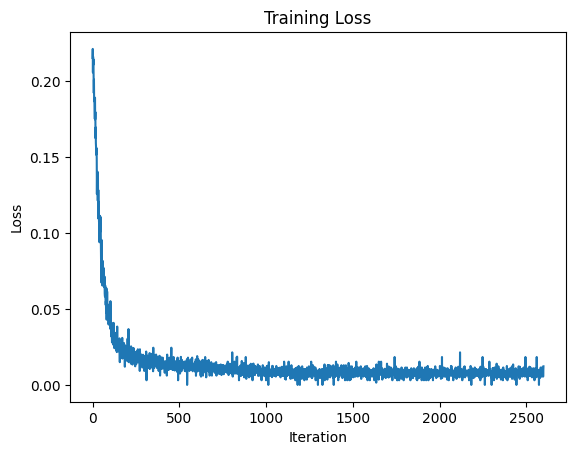

In [21]:
#TODO



model_1_5 = train_NNet(train_X_1_5, train_y_1_5.reshape(1, -1), epochs=200, eta=0.00006)




**Q12.** Do the same as in Q11 with the digits $7$ and $9$ Name this model, model_7_9. This model will be tested on unseen test data within the grader. So make sure you train the best possible model. The grader will use your own predict function to evaluate the model.

Epoch 1, Loss: 0.294266629533929
Epoch 2, Loss: 0.25470847947047115
Epoch 3, Loss: 0.2476602886202053
Epoch 4, Loss: 0.23910444948724133
Epoch 5, Loss: 0.2033301967454719
Epoch 6, Loss: 0.22663147479946028
Epoch 7, Loss: 0.19392308399254132
Epoch 8, Loss: 0.2053654471065575
Epoch 9, Loss: 0.13276076286331057
Epoch 10, Loss: 0.1682024534868628
Epoch 11, Loss: 0.15406347483971244
Epoch 12, Loss: 0.13319405401819848
Epoch 13, Loss: 0.16351832812911138
Epoch 14, Loss: 0.10057821960249722
Epoch 15, Loss: 0.12849749743831584
Epoch 16, Loss: 0.11690912724319895
Epoch 17, Loss: 0.12227630558610604
Epoch 18, Loss: 0.1165731139219109
Epoch 19, Loss: 0.10280475793508305
Epoch 20, Loss: 0.11444798694831172
Epoch 21, Loss: 0.07277754706393684
Epoch 22, Loss: 0.10747592562190435
Epoch 23, Loss: 0.08411214476589451
Epoch 24, Loss: 0.11295090037576545
Epoch 25, Loss: 0.08411214227271588
Epoch 26, Loss: 0.07927798380066374
Epoch 27, Loss: 0.06774586907300383
Epoch 28, Loss: 0.08879216549644549
Epoch 29

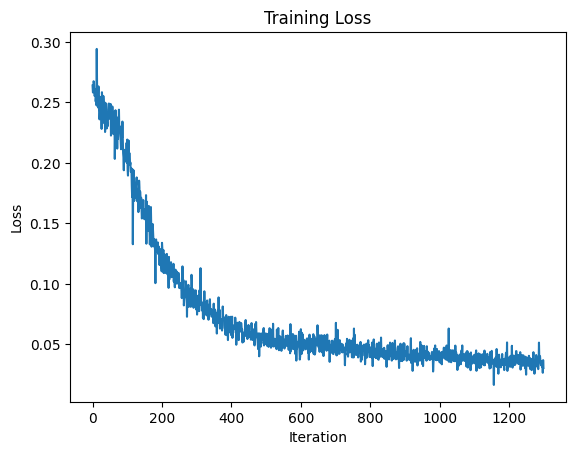

In [17]:
#TODO





X_7_9, y_7_9 = extract_digits(train_X, train_y, 7, 9)
train_X_7_9 = vectorize_images(X_7_9)
train_y_7_9 = np.where(y_7_9 == 9, 1, 0)
model_7_9 = train_NNet(train_X_7_9, train_y_7_9.reshape(1, -1), epochs=100, eta=0.00005)

In [22]:
# Prediction and evaluation code
def predict(model, test_images, d1, d2):
    X_test = vectorize_images(test_images)
    temp_model = NNet(input_size=784, output_size=1, 
                    batch_size=X_test.shape[1], 
                    hidden_layers=model.hidden_layers)
    temp_model.W = model.W  # Use trained weights
    temp_model = feedforward(temp_model, X_test)
    preds = (temp_model.Y[-1] >= 0.5).astype(int).flatten()
    return np.where(preds, d2, d1)

# For 1 vs 5 classification
test_images_1_5, test_labels_1_5 = extract_digits(train_X, train_y, 1, 5)
pred_1_5 = predict(model_1_5, test_images_1_5, 1, 5)

print("\n1 vs 5 Predictions:")
for i in range(10):
    print(f"Predicted: {pred_1_5[i]}, Actual: {test_labels_1_5[i]}")

# For 7 vs 9 classification 
test_images_7_9, test_labels_7_9 = extract_digits(train_X, train_y, 7, 9)
pred_7_9 = predict(model_7_9, test_images_7_9, 7, 9)

print("\n7 vs 9 Predictions:")
for i in range(10):
    print(f"Predicted: {pred_7_9[i]}, Actual: {test_labels_7_9[i]}")

# Calculate accuracy
def calculate_accuracy(preds, true_labels):
    return np.mean(preds == true_labels) * 100

acc_1_5 = calculate_accuracy(pred_1_5, test_labels_1_5)
acc_7_9 = calculate_accuracy(pred_7_9, test_labels_7_9)

print(f"\n1 vs 5 Accuracy: {acc_1_5:.2f}%")
print(f"7 vs 9 Accuracy: {acc_7_9:.2f}%")


1 vs 5 Predictions:
Predicted: 5, Actual: 5
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 5, Actual: 5
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 5, Actual: 1
Predicted: 5, Actual: 5
Predicted: 1, Actual: 1

7 vs 9 Predictions:
Predicted: 9, Actual: 9
Predicted: 7, Actual: 7
Predicted: 9, Actual: 9
Predicted: 7, Actual: 9
Predicted: 7, Actual: 7
Predicted: 9, Actual: 9
Predicted: 7, Actual: 7
Predicted: 7, Actual: 7
Predicted: 9, Actual: 9
Predicted: 9, Actual: 9

1 vs 5 Accuracy: 98.44%
7 vs 9 Accuracy: 93.02%
